# NNIA Assignment 3

**DEADLINE: 30. 11. 2021 08:00 CET**  
Submissions past the deadline (08.01) will **not** be graded!

- Name & ID 1: Eva Richter (s8evrich), 2559531
- Name & ID 2: Antonia (anwa00001), 7007542
- Hours of work per person: 10

# Submission Instructions

**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the assignment deadline. All course-related questions can be addressed on the course **[Piazza Platform](https://piazza.com/class/l9so16qqvk34hu)**.

* Assignments are to be submitted in a **team of 2/3**.
* Please include your **names**, **ID's**, **Teams usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required. 
* Your final submission should contain this completed Jupyter Notebook, including the bonus question (if you attempt it), and any necessary Python files.
* Do **not** submit any data or cache files (e.g. `__pycache__`).
* Upload the **zipped** folder (*.zip* is the only accepted extension) in **Teams**.
* Only **one member** of the group should make the submisssion.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2_Name3_id3.zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2_Name3_id3.ipynb`. This is **very important** for our internal organization.

<font color="red">Failure to follow the above instructions will result in point penalties at the discretion of the instructors.</font>.

# Regressions and Model Evaluation

The objectives of the exercises in this assignment are:

*   to develop an intuitive understanding of a regression model's trainable parameters
*   to have a better understanding of PCA in practice 
*   to familiarize ourselves with how to fit various regression models
*   to learn about various evaluation metrics and their characteristics

Before going ahead with the exercises, recall the following information about Simple and Multiple Linear Regressions from the lecture slides.


*   A *Simple Linear Regression* model predicts a quantitative response $y$ given a single predictor variable $x$ using the best fitting line $y \approx mx + b$ for the observed data.

*   In *Multiple Linear Regression*, the model predicts a quantitative response $y$ given multiple predictor variables by fitting a model $y \approx w_{0} +w_{1}x_{1} + w_{2}x_{2} +... + w_{n}x_{n}$ to the observed data.

*   An ideal model minizes the average squared distance between estimated response of the *i*−th sample $\hat{y}^{train}$ and actual response $y^{train}$ of the *i*−th
sample:


$$MSE_{train} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_{i}^{train} - y_{i}^{train})^{2} $$

*   To minimize $MSE_{train}$, we can set the gradient w.r.t. $w$ to $0$, solving for the weights or parameters $w$:

$$w = (X_{train}^{T}X_{train})^{-1}X_{train}^{T}y_{train}$$

# 1. Linear Regression Manually (2.5 points)

In this task we ask you to solve linear regression manually to gain better understanding of internals of sklearn method, that you are allowed to use for next tasks.

1.1 Implement linear regression manually following the instructions above (1.5 points)

1.2 How does RMSE change depending on the test size? What does it show? (0.5 points)

1.3 What makes this approach inefficient? (0.5 points)

## 1.1 <font color="green">Done</font>

In [45]:
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import math

def manual_linear_regression(test_size: int = 0.1, seed: int = 42):
    # Load the dataset.
    dataset = load_diabetes()

    # The input data are in `dataset.data`, targets are in `dataset.target`.
    #print(dataset.data, dataset.target)

    # If you want to learn more about the dataset, you can print some information
    # about it using `print(dataset.DESCR)`.
    # print(dataset.data.shape)

    # TODO: Append a constant feature with value 1 to the end of every input data.
    # Then we do not need to explicitly represent bias - it becomes the last weight.
    input_data = dataset.data
    target_data = dataset.target
    constant_feature = np.ones((input_data.shape[0], 1))   
    input_data = np.concatenate((input_data, constant_feature), axis = 1)    

    # TODO: Split the dataset into a train set and a test set.
    # Use `sklearn.model_selection.train_test_split` method call, passing
    # arguments `test_size, random_state=seed`.
    x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=test_size, random_state=seed)
    
    # TODO: Solve the linear regression using the algorithm from the lecture,
    # explicitly computing the matrix inverse (using `np.linalg.inv`). 
    w = np.dot(np.dot(np.linalg.inv(np.dot(x_train.transpose(), x_train)), x_train.transpose()), y_train)    
    
    # TODO: Predict target values on the test set.
    # y_predicted = np.matmul(w.transpose(), x_test.transpose())
    y_predicted = np.dot(x_test, w)
   
    # TODO: Manually compute root mean square error on the test set predictions.
    summation = 0  #variable to store the summation of differences
    n = len(y_predicted) #finding total number of items in list of predictions (y_predicted)
    
    for i in range (0,n):  #looping through each element of the list from 0 to end of y_predicted
        
        difference = y_predicted[i] - y_test[i]  #finding the difference between observed and predicted value
        squared_difference = difference**2  #taking square of the differene 
        summation = summation + squared_difference  #taking a sum of all the differences
    
    mse = summation/n  #dividing summation by total values to obtain average
    rmse = math.sqrt(mse) #taking square root of the mse
    
    print("The Root Mean Square Error for is: " , rmse)
    return rmse


manual_linear_regression(), manual_linear_regression(test_size=0.5), manual_linear_regression(test_size=0.9)

The Root Mean Square Error for is:  52.382356168443614
The Root Mean Square Error for is:  54.57653642487506
The Root Mean Square Error for is:  59.45829460892974


(52.382356168443614, 54.57653642487506, 59.45829460892974)

### 1.2 <font color="green">Done</font>

The RMSE increases as the test size increases: RMSE is the highest for the biggest test size (0.9), then for the middle test size (0.5) and the lowest for the smallest test size (0.1). This is because an increase in the test size automatically causes a decrease in the size of the training data. Since using a smaller training size results in the model seing less training examples based on which it has to predict more examples of the test set, it makes sense that the error for an increasing test set size also increases.

### 1.3 <font color="green">Done</font>

Due to being computationally expensive and numerically unstable computing linear regression in this way is not optimal/inefficient.

## 2 Efficient Linear Regression (3.5 points)

For the other tasks, we will be working with the [California Housing Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) unless otherwise indicated.
Recall that there are 8 features that influence the housing prices in California according to this dataset. 

Although we want to consider as many predictive features as we can in our model, doing so may not necessarily be practical or desirable. Let's consider an assumption that Linear Regression is an algorithm that takes one extra hour to compute for every input feature (it does not but some models may work like this). Therefore, for the sake of efficiency, we want to limit the number of features in the dataset to 3.

## 2.1 Dimensions $8 \rightarrow 3$ (2 points)

To reduce the 8 features to 3, we need to find out which features we should keep and which ones we can ignore. Implement the following two methods to find out:

1. Try all subsets of size 3 of all the features and report which subset results in a Linear Regression model with the lowest MSE. (1 points)
2. Perform PCA to 3 dimensions (components) and fit a Linear Regression using these 3 features. Report the 3 features selected by PCA and the MSE. (0.5 points)
3. Compare the approaches and name one advantage of each over the other method. Comment on any insight you gain about the relationship between housing prices and the selected features in the dataset. (0.5 points)

### 2.1.1 <font color="green">Done</font>

In [46]:
%load_ext autoreload
%autoreload 2
    
# from solution import ....
# import your function from your .py file here and run this cell when you're done!
# outputs should be MSEs and feature names
from solution import subset_selection_8_3
subset_selection_8_3()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
For subset:  ['MedInc', 'HouseAge', 'AveRooms'] The Mean Squared Error is:  0.6496608827746709
For subset:  ['MedInc', 'HouseAge', 'AveBedrms'] The Mean Squared Error is:  0.653432119800549
For subset:  ['MedInc', 'HouseAge', 'Population'] The Mean Squared Error is:  0.6524644655188551
For subset:  ['MedInc', 'HouseAge', 'AveOccup'] The Mean Squared Error is:  0.651544297323149
For subset:  ['MedInc', 'HouseAge', 'Latitude'] The Mean Squared Error is:  0.6428821991178659
For subset:  ['MedInc', 'HouseAge', 'Longitude'] The Mean Squared Error is:  0.6533445563317425
For subset:  ['MedInc', 'AveRooms', 'AveBedrms'] The Mean Squared Error is:  0.6541749417574403
For subset:  ['MedInc', 'AveRooms', 'Population'] The Mean Squared Error is:  0.6916413203415845
For subset:  ['MedInc', 'AveRooms', 'AveOccup'] The Mean Squared Error is:  0.6913124252392114
For subset:  ['MedInc', 'AveRooms', 'Latitude'] The 

### 2.1.2 <font color="green">Done</font>

In [47]:
# from solution import ....
# import your function from your .py file here and run this cell when you're done!
# outputs should be MSE and feature names

from solution import pca_8_3
pca_8_3()

Features selected by PCA: ['Latitude', 'AveRooms', 'Population']
MSE of features selected by PCA: 1.2649653917081498


### 2.1.3 <font color="green">Done</font>

The first approach has a smaller MSE (0.55) than the pca-based approach (1.26) and is therefore better in this respect. In addition, the first approach is more transparent, as the original features are retained. In this context, there is also no loss of information as with PCA, since the dimensions are retained and not compressed.  
On the other hand, PCA has the advantage that it is computationally less expensive because the features are compressed and it's not necessary to go through all possible combinations like in the first approach. In this case, there were "only 56" possible subsets, but this number would increase exponentially with an increasing number of features, which is computationally unfavourable. Since the respective principal components are combinations of all original features, all features are ultimately present in the principal components and thus in the linear regression model. However, it is more difficult to analyse and explain them because they are combinations of features and not concrete features as is the case in the first approach.

We can conclude that using the first approach the most useful features from our set to make predictions about the housing prices are median income in block group, average number of rooms per household and median house age in block group. These features are the best predictors for the price of a house. Using the second approach the most of the variance in the data was found to be explained by block group latitude, average number of rooms per household and block group population.

Since "MedInc" and "Latitude" are selected as the strongest predictors, it shows that they have a particularly strong influence. However, the only feature selected from both approaches is "Latitude". It occurs in the subset of three features using the first approach and is also the feature selected by pca because it has the strongest relationship to the first principal component.



## 2.2 Dimensions $8 \rightarrow 1$ (1.5 points)

Having to visualize the data across multiple dimensions can be cumbsersome. Let's perform the same task as in 2.1 but this time consider only one feature (both a subset of the 8 features and PCA with 1 component). This way it will be easier to visualize the relationaship of your predictive and target variables. Of course, you still want to select the feature that will result in the best performing model.

Your output should include:

1.   The respective MSEs (only the lowest MSE for the subset is fine.)
2.   Make [a scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) of the data with prices on the $y$ axis and the single feature/principal component on the $x$ axis. In the plot, also include a line as defined by the Linear Regression. (Make sure you don't forget to set the correct slope and y-intercept (constant)).

Feature selected by LR:  MedInc
MSE of selected feature:  [0.70113115]


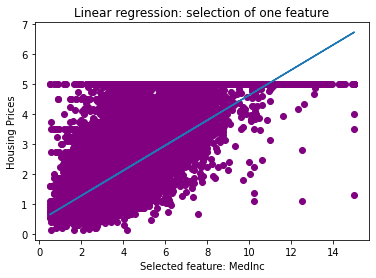

Feature selected by PCA: ['Latitude']
MSE of feature selected by PCA: 1.3038777748380384


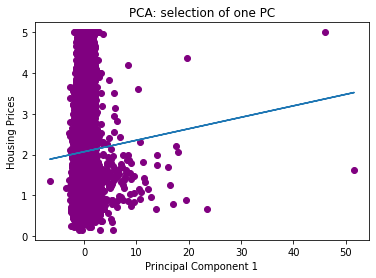

In [48]:
# from solution import ....

# import your function from your .py file here and run this cell when you're done!
# outputs should be the MSEs, feauture names, and plots (make sure to label your plots!)

from solution import feature_selection_8_1

feature_selection_8_1()

## 3 Manual Regression (4 points)

Now that you are a bit more familiar with the data and the features. This exercise aims to develop some intuition behind regressions by manually adjusting the parameters (coefficients and intercept) in the model. The functions below all perform regression (predicting a real value) but they are far from perfect. Your goal is to improve the four functions from the initial ones in the `code cells` as follows:

1. `hand_base` should serve as a baseline. The constraint is that it should only return a *single (constant) number* for all values. In other words, this is a model with no adjustable parameters. However, for the dataset there exists a unique value that minimizes the Mean Squared Error (MSE). Which one is it? (0.5 points) 
2. `hand_linear` should be a reasonable *linear* function that utilizes the input feature(s). Note that it should be strictly linear, that is in the form $\sum \lambda_i x_i+\lambda_{const}$ where $\lambda_k$ and $\lambda_{const}$ are the coefficients and intercept that you can estimate from the given data by *trial and error*. Your estimates should be reasonable, i.e. definitely better than `hand_base`. Do this exercise before proceeding to the next function where you will obtain the coefficients and intercepts from fitting a Linear Regression model using *sklearn*. We will award full points based on any justified solution that's better than `hand_base`. Make sure that you read what the features mean and argue why you chose the specific formula. (1 point) (Note: we are *not* asking you to compute the coefficients and intercept, but rather play around with adjusting the coefficients and intercept manually to arrive at your best estimate.)
3. `auto_linear`, obtain the coefficients and intercept from fitting a Linear Regression model using `sklearn`.
(Consult [sklearn Linear Regression Documention](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) on how to obtain the model's coefficients and intercept.) (1 point)

4. `hand_complex` does not have any restriction on the content of the function. It can contain polynomial relationships (e.g. `x[0]*x[0]`), `if-else` statements, etc.) Now that you have both your hand crafted model and the one from `sklearn`, improve upon either of the models (or you can start with the parameters in the `auto_linear` model) so that the performance of the `hand_complex` is better than `auto_linear`.
What are the disadvantages of this more complex approach apart from the difficulty of creating it? (Hint: think about unseen data.)

Always comment on what led you to select the specific values.

## 3 <font color="green">Done</font>

Modify the functions in the `code cell` below.


In [49]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor


housing= fetch_california_housing(return_X_y=True)
housing_x=housing[0]
housing_y=housing[1]


def hand_base(x):
    # Done: choose better single value
    # By trial and error we find out that 2 minimizes the mse to 1.34
    return 2


def hand_linear(x):
    # TODO: make me better but only linearly
    sum=0.4*x[0]+0*x[1]-0.1*x[2]+0.7*x[3]-0*x[4]-0*x[5]-0.4*x[6]-0.4*x[7]
    return sum+lin_regressor.intercept_
  

# TODO:
# 1. Fit LinearRegression
# 2. Report training MSE
# 3. Examine the coefficients and intercept and use them for the `auto_linear` function
# <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>

lin_regressor = LinearRegression()
lin_regressor.fit(housing_x,housing_y)
print("Training mse:",mse(housing_y,lin_regressor.predict(housing_x)))
print("coefficients:",lin_regressor.coef_)
print("intercept",lin_regressor.intercept_)

def auto_linear(x):
     # TODO: use coefficients from your linear regression    
    sum=0
    for i in range(0,8):
        sum+=lin_regressor.coef_[i]*x[i]
    return sum+lin_regressor.intercept_


def hand_complex(x):
    # TODO: make me better than the auto_linear function
    #DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
    #Fit the regressor object to the dataset.
    #sum=0
    #for i in range(0,8):
    #    sum+=regressor.feature_importances_*x[i]
    # return sum
     return 0   


print(f"MSE Hand-Base: {mse(housing_y,[hand_base(x) for x in housing_x]):.2f}")
print(f"MSE Hand-Linear: {mse(housing_y, [hand_linear(x) for x in housing_x]):.2f}")
print(f"MSE Auto-LR: {mse(housing_y, [auto_linear(x) for x in housing_x]):.2f}")

#regressor = DecisionTreeRegressor(random_state=0)
#regressor.fit(housing_x,housing_y)
#print(regressor.feature_importances_)
print(f"MSE Hand-Complex: {mse(housing_y, [hand_complex(x) for x in housing_x]):.2f}")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training mse: 0.5243209861846072
coefficients: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
intercept -36.94192020718439
MSE Hand-Base: 1.34
MSE Hand-Linear: 13.96
MSE Auto-LR: 0.52
MSE Hand-Complex: 5.61


# Bonus. Polynomial Regression and Overfitting (1 point):

Find out how incorporating more features affects our model on the [California Housing Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

1. Transform the feature space using polynomial features: <https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html> (hint: make use of the Pipeline class) and run a regression model on top of it. Use degrees 1, 2, 3 and 4. 

2. Make a scatter plot with polynomial degree on the x-axis and training MSE on the y axis. What is an essential caveat to expanding the original feature space like this? (Hint: Think of unseen data again.)

## Bonus: <font color="red">To Do</font>


In [50]:
%load_ext autoreload
%autoreload 2
  
# from solution import ....
# import your function from your .py file here and run this cell when you're done!

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
